Comparing the experimental holograms to Mie theory via holopy to the Rayliegh Gans approximation defined in this module.

In [1]:
%matplotlib inline

In [2]:
import holopy as hp
from holopy.core.process import bg_correct
from holopy.scattering import calc_holo, Sphere

from holoinfer.model import hologram
import holoinfer.model.math as m

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

from time import time as t

Experimental data:

In [3]:
rholo = hp.core.load_image('exp_data_1/r_particle_0.png', channel=0, 
                          medium_index=1.33, spacing=0.0858, illum_polarization=(1,0), illum_wavelen=.660)

bgimg = ['exp_data_1/r_particle_bg_0.png', 'exp_data_1/r_particle_bg_1.png', 'exp_data_1/r_particle_bg_2.png']
bg = hp.core.io.load_average(bgimg, refimg = rholo, channel=0)
expholo = bg_correct(rholo, bg)

Mie theory from holopy

In [4]:
pixel_size = 0.0858 # All units are in microns
grid_size = int(np.sqrt(expholo.size))

In [5]:
illum_wavelength = .660
med_index = 1.33

sc_center = np.array([200*pixel_size, 350*pixel_size, 5])
sc_radius = .5
sc_index = 1.4734

In [6]:
detector = hp.detector_grid(shape = grid_size, spacing = pixel_size)
sphere = Sphere(n = sc_index, r = sc_radius, center = sc_center)

go = t()
mieholo = calc_holo(detector, sphere, medium_index=med_index, illum_wavelen=illum_wavelength, illum_polarization=(1,0))
print(t()-go)

2.874553918838501


Rayleigh-Gans model with same parameters

In [7]:
illum_wavenumber = 2*np.pi/illum_wavelength
rel_index = np.array([sc_index/med_index, 0])

x = y = np.linspace(0, pixel_size*grid_size, grid_size)
z = 0
detector_grid = m.cartesian(x, y, z)

go = t()
rgholo = hologram.rayleigh_gans_sphere_holo(detector_grid, illum_wavenumber, sc_center, rel_index, sc_radius)
print(t()-go)

0.09606719017028809


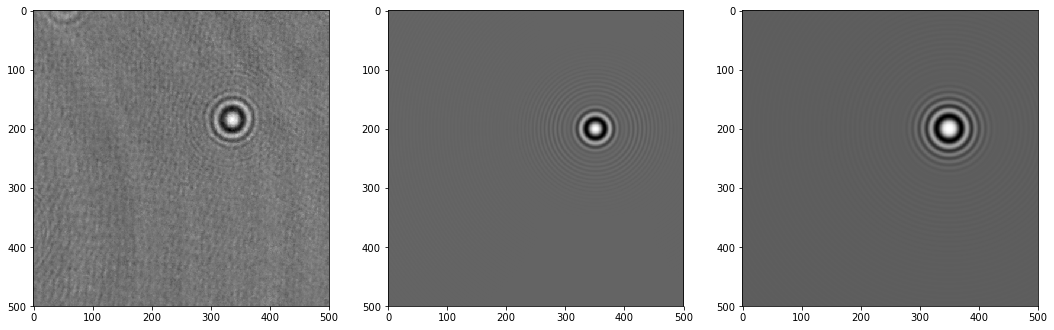

In [8]:
expholo = expholo.squeeze()
mieholo = mieholo.squeeze()
rgholo = rgholo.reshape((grid_size, grid_size))
rgholo = rgholo.T

plt.gray()
plt.figure(figsize=(18, 16))

plt.subplot(1,3,1)
plt.imshow(expholo)
plt.subplot(1,3,2)
plt.imshow(mieholo)
plt.subplot(1,3,3)
plt.imshow(rgholo)

Difference Between Mie theory and Rayleigh Gans

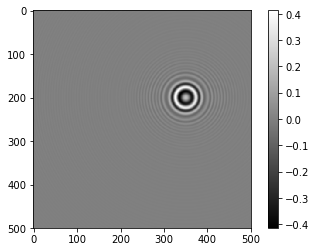

In [9]:
plt.imshow(mieholo - rgholo)
plt.colorbar()

In [10]:
np.sum((mieholo.values-rgholo)**2)

236.34641360894668

Other experimental data from same session.

In [ ]:
rholo = hp.core.load_image('exp_data_1/r_particle_1.png', channel=0, 
                          medium_index=1.33, spacing=0.0858, illum_polarization=(1,0), illum_wavelen=.660)

bgimg = ['exp_data_1/r_particle_bg_0.png', 'exp_data_1/r_particle_bg_1.png', 'exp_data_1/r_particle_bg_2.png']
bg = hp.core.io.load_average(bgimg, refimg = rholo, channel=0)
holo = bg_correct(rholo, bg)
hp.show(holo)

In [ ]:
rholo = hp.core.load_image('exp_data_1/r_dimer_0.png', channel=0, 
                          medium_index=1.33, spacing=0.0858, illum_polarization=(1,0), illum_wavelen=.660)

bgimg = ['exp_data_1/r_dimer_bg_0.png', 'exp_data_1/r_dimer_bg_1.png',
         'exp_data_1/r_dimer_bg_2.png', 'exp_data_1/r_dimer_bg_3.png']
bg = hp.core.io.load_average(bgimg, refimg = rholo, channel=0)
holo = bg_correct(rholo, bg)
hp.show(holo)

In [ ]:
rholo = hp.core.load_image('exp_data_1/r_dimer_1.png', channel=0, 
                          medium_index=1.33, spacing=0.0858, illum_polarization=(1,0), illum_wavelen=.660)

bgimg = ['exp_data_1/r_dimer_bg_0.png', 'exp_data_1/r_dimer_bg_1.png',
         'exp_data_1/r_dimer_bg_2.png', 'exp_data_1/r_dimer_bg_3.png']
bg = hp.core.io.load_average(bgimg, refimg = rholo, channel=0)
holo = bg_correct(rholo, bg)
hp.show(holo)